In [1]:
import pickle
import os
import numpy as np
import copy
import pandas as pd
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
import json

In [2]:
def get_acc_dicts_for_state(state_acc_dir_local):
    
    dh_pin_wise_acc_dict_local = {}
    pin_wise_acc_dict_local = {}
    for file in os.listdir(state_acc_dir_local):
        if file.endswith('.pickle'):
            dh_name = file.replace('acc_dh_', '').replace('.pickle', '')
            
            acc_file_path_local = os.path.join(state_acc_dir_local, file)
            acc_dict_local = load_acc(acc_file_path_local)
                
            dh_pin_wise_acc_dict_local[dh_name] = acc_dict_local
            
            for pin, pin_acc in dh_pin_wise_acc_dict_local[dh_name].items():
                pin_wise_acc_dict_local[pin] = pin_acc
            
    print('len of dh_wise_acc {} and len of pin_wise_acc {} '.format(len(dh_pin_wise_acc_dict_local), len(pin_wise_acc_dict_local)))
    return dh_pin_wise_acc_dict_local, pin_wise_acc_dict_local

def load_acc_dict_deb_9(acc_file_path_local):
    with open(acc_file_path_local, 'rb') as fp:
        acc_dict = pickle.load(fp)

        
    acc_dict_int = {}
    
    for k,v in acc_dict.items():
        acc_dict_int[int(k)] = v
    
    return acc_dict_int

pin_start_dig_list = ['1', '2', '3', '4', '5', '6', '7', '8']

phase_1_group_wise_acc_dict= {}
for pin_start_dig in pin_start_dig_list:
    acc_path = '/disk_4/grid_v21/data/dicts/misc/acc_grid_v2/test_acc_dict_grp_'+pin_start_dig+'.json'
    
    acc_dict = load_acc_dict_deb_9(acc_path)
    
    phase_1_group_wise_acc_dict[pin_start_dig] = acc_dict


phase_1_pin_wise_acc_dict_loaded = {}
for k,v in phase_1_group_wise_acc_dict.items():
    phase_1_pin_wise_acc_dict_loaded.update(v)

print(len(phase_1_pin_wise_acc_dict_loaded))

phase_1_pin_wise_acc_dict = {}

for k,v in phase_1_pin_wise_acc_dict_loaded.items():
    phase_1_pin_wise_acc_dict[str(k)] = v



def load_acc(acc_path_local):
    with open(acc_path_local, 'rb') as fp:
        acc_dict_local = pickle.load(fp)
    return acc_dict_local


def get_acc_dicts_for_state(state_acc_dir_local):
    
    dh_pin_wise_acc_dict_local = {}
    pin_wise_acc_dict_local = {}
    for file in os.listdir(state_acc_dir_local):
        if file.endswith('.pickle'):
            dh_name = file.replace('acc_dh_', '').replace('.pickle', '')
            
            acc_file_path_local = os.path.join(state_acc_dir_local, file)
            acc_dict_local = load_acc(acc_file_path_local)
                
            dh_pin_wise_acc_dict_local[dh_name] = acc_dict_local
            
            for pin, pin_acc in dh_pin_wise_acc_dict_local[dh_name].items():
                pin_wise_acc_dict_local[pin] = pin_acc
            
    print('len of dh_wise_acc {} and len of pin_wise_acc {} '.format(len(dh_pin_wise_acc_dict_local), len(pin_wise_acc_dict_local)))
    return dh_pin_wise_acc_dict_local, pin_wise_acc_dict_local


    
def get_all_pin_acc_dict(state_wise_pin_acc_dict_local):
    all_pin_wise_acc_dict_local = {}
    
    for state in state_wise_pin_acc_dict_local:
        for pin, pin_acc in state_wise_pin_acc_dict_local[state].items():
            all_pin_wise_acc_dict_local[pin] = pin_acc
            
            
    all_pin_wise_acc_dict_local_2 = {}
    for k,v in all_pin_wise_acc_dict_local.items():
        all_pin_wise_acc_dict_local_2[str(k)] = v
    
    
    print('len of all_pin_wise_acc_dict_local ', len(all_pin_wise_acc_dict_local_2))
    return all_pin_wise_acc_dict_local_2


state_to_do_list = ['PUDUCHERRY', 'JHARKHAND', 'SIKKIM', 'TRIPURA', 'HIMACHAL_PRADESH', 'MADHYA_PRADESH', 'ODISHA', 
                    'WEST_BENGAL', 'TAMIL_NADU', 'JAMMU_AND_KASHMIR', 'UTTARAKHAND', 'CHHATTISGARH', 'HARYANA', 
                    'ARUNACHAL_PRADESH', 'MEGHALAYA', 'PUNJAB', 'NAGALAND', 'MIZORAM', 'MAHARASHTRA', 'KARNATAKA',
                    'KERALA', 'CHANDIGARH', 'GUJARAT', 'RAJASTHAN', 'GOA', 'ASSAM', 'ANDHRA_PRADESH', 'BIHAR', 
                    'UTTAR_PRADESH', 'TELANGANA', 'MANIPUR']
state_wise_pin_acc_dict = {}
for state_to_do in state_to_do_list:
    state_acc_dir = '/disk_4/grid_v21/data/dicts/misc/dh_acc_dicts/dh_acc_dicts_L1/state_grp_'+state_to_do+'/'

    print('\n state ', state_to_do)
    dh_pin_wise_acc_dict, pin_wise_acc_dict = get_acc_dicts_for_state(state_acc_dir)
    
    state_wise_pin_acc_dict[state_to_do] = pin_wise_acc_dict
    
    
    
phase_II_pin_wise_acc_dict = get_all_pin_acc_dict(state_wise_pin_acc_dict)


better_btw_p_I_II = {}
all_pin_p1_vs_p2 = {}

for k,v in phase_1_pin_wise_acc_dict.items():
    if k in phase_II_pin_wise_acc_dict:
        p_I_acc = v['per'][500]
        p_II_acc = phase_II_pin_wise_acc_dict[k]['per'][500]
        
        
        if p_II_acc > p_I_acc + 0.01:
            better_btw_p_I_II[k] = "p2"
            all_pin_p1_vs_p2[k]  = "p2"
#             print(p_II_acc, p_I_acc)
        else:
            better_btw_p_I_II[k] = "p1"
            all_pin_p1_vs_p2[k]  = "p1"
            
            
            
    else:
        all_pin_p1_vs_p2[k]  = "p1"
        
for k,v in phase_II_pin_wise_acc_dict.items():
    if k not in all_pin_p1_vs_p2:
        all_pin_p1_vs_p2[k]  = "p2"
        
            
print('len(better_btw_p_I_II, len(all_pin_p1_vs_p2)) ', len(better_btw_p_I_II), len(all_pin_p1_vs_p2))

## merge p I & p II dicts
updated_phase_I_II_pin_wise_acc_dict = {}
only_phase_2_additional_pin_wise_acc_dict = {}
only_phase_1_additional_pin_wise_acc_dict = {}

for pin in all_pin_p1_vs_p2:
    if all_pin_p1_vs_p2[pin] == 'p1':
        updated_phase_I_II_pin_wise_acc_dict[pin] = phase_1_pin_wise_acc_dict[pin]
    else:
        updated_phase_I_II_pin_wise_acc_dict[pin] = phase_II_pin_wise_acc_dict[pin]
        
            
for pin in phase_II_pin_wise_acc_dict:
    if all_pin_p1_vs_p2[pin] == 'p2':
        only_phase_2_additional_pin_wise_acc_dict[pin] = phase_II_pin_wise_acc_dict[pin]

        
for pin in phase_1_pin_wise_acc_dict:
    if all_pin_p1_vs_p2[pin] == 'p1':
        only_phase_1_additional_pin_wise_acc_dict[pin] = phase_1_pin_wise_acc_dict[pin]
  
        
print(len(updated_phase_I_II_pin_wise_acc_dict), len(only_phase_2_additional_pin_wise_acc_dict), len(only_phase_1_additional_pin_wise_acc_dict))



def calculate_total_deliveries(acc_dict):
    total_deliveries = {}
    for pincode, data in acc_dict.items():
        num_2000 = data['num'].get(2000, 0)
        num_rest = data['num'].get('rest', 0)
        num_none = data['num'].get("None" , 0)
        total_deliveries[pincode] = num_2000 + num_rest
    return total_deliveries


total_deliveries = calculate_total_deliveries(updated_phase_I_II_pin_wise_acc_dict)




2144

 state  PUDUCHERRY
len of dh_wise_acc 2 and len of pin_wise_acc 22 

 state  JHARKHAND
len of dh_wise_acc 45 and len of pin_wise_acc 193 

 state  SIKKIM
len of dh_wise_acc 6 and len of pin_wise_acc 8 

 state  TRIPURA
len of dh_wise_acc 18 and len of pin_wise_acc 48 

 state  HIMACHAL_PRADESH
len of dh_wise_acc 11 and len of pin_wise_acc 68 

 state  MADHYA_PRADESH
len of dh_wise_acc 53 and len of pin_wise_acc 189 

 state  ODISHA
len of dh_wise_acc 77 and len of pin_wise_acc 393 

 state  WEST_BENGAL
len of dh_wise_acc 161 and len of pin_wise_acc 877 

 state  TAMIL_NADU
len of dh_wise_acc 109 and len of pin_wise_acc 1009 

 state  JAMMU_AND_KASHMIR
len of dh_wise_acc 6 and len of pin_wise_acc 33 

 state  UTTARAKHAND
len of dh_wise_acc 14 and len of pin_wise_acc 47 

 state  CHHATTISGARH
len of dh_wise_acc 22 and len of pin_wise_acc 106 

 state  HARYANA
len of dh_wise_acc 37 and len of pin_wise_acc 185 

 state  ARUNACHAL_PRADESH
len of dh_wise_acc 6 and len of pin_wise_acc 7

In [3]:
pin_dh_mapping_path = "/disk_4/grid_v21/data/dicts/misc/pincode_dh_mapping.csv"
df_mapping = pd.read_csv(pin_dh_mapping_path)
df_mapping = df_mapping.drop_duplicates(subset='Pincode')
df_mapping['Pincode'] = df_mapping['Pincode'].astype(str)

In [51]:
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

def load_acc(acc_path_local):
    with open(acc_path_local, 'rb') as fp:
        acc_dict_local = pickle.load(fp)
    return acc_dict_local

def calculate_state_accuracies(merged_data, acc_dict, state_total_deliveries):
    state_accuracies = {}

    for pincode, data in acc_dict.items():
        state = merged_data.loc[merged_data['Pincode'] == pincode, 'State'].values
        if len(state) > 0:
            state = state[0]
            if pd.isna(state):
                continue 
            if state not in state_accuracies:
                state_accuracies[state] = {100: 0, 200: 0, 500: 0, 1000: 0, 2000: 0}
            for drift in [100, 200, 500, 1000, 2000]:
                if drift in data['num']:
                    state_accuracies[state][drift] += data['num'][drift] 

    for state in state_accuracies:
        if state in state_total_deliveries and state_total_deliveries[state] > 0:
            for drift in state_accuracies[state]:
                state_accuracies[state][drift] /= state_total_deliveries[state]
        else:
            for drift in state_accuracies[state]:
                state_accuracies[state][drift] = 0

    return state_accuracies


def plot_state_heatmap(state_accuracies, shapefile_path):
    state_accuracies_df = pd.DataFrame.from_dict(state_accuracies, orient='index')
    state_accuracies_df.reset_index(inplace=True)
    state_accuracies_df.rename(columns={'index': 'State'}, inplace=True)

    gdf_india = gpd.read_file(shapefile_path)
    gdf_india['State_Name'] = gdf_india['State_Name'].str.upper()
    state_accuracies_df['State'] = state_accuracies_df['State'].str.upper()

    state_accuracies_df = state_accuracies_df.replace({
        'State': {
            'TAMIL NADU': 'TAMILNADU',
            'CHHATTISGARH': 'CHHATTISHGARH',
            'TELANGANA': 'TELENGANA',
            'ANDAMAN & NICOBAR': 'ANDAMAN AND NICOBAR',
            'JAMMU AND KASHMIR': 'JAMMU & KASHMIR',
            'DAMAN AND DIU AND DADRA AND NAGAR HAVELI': 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU'
        }
    })

    gdf_merged = gdf_india.set_index('State_Name').join(state_accuracies_df.set_index('State'), how='left')
    gdf_merged.fillna(0, inplace=True)
    
    fig, axes = plt.subplots(3, 2, figsize=(20, 30))
    drifts = [100, 200, 500, 1000, 2000]

    # for i, drift in enumerate(drifts):
    #     ax = axes[i//2, i%2]
    #     gdf_merged.plot(column=drift, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    #     ax.set_title(f'State-wise Average Accuracy at {drift}m', fontdict={'fontsize': '15', 'fontweight' : '3'})
    #     ax.axis('off')

    for i, drift in enumerate(drifts):
        ax = axes[i//2, i%2]
        gdf_merged.plot(column=drift, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=0.4, vmax=1.0)
        ax.set_title(f'State-wise Average Accuracy at {drift}m', fontdict={'fontsize': '15', 'fontweight' : '3'})
        ax.axis('off')
    

    plt.tight_layout()
    plt.show()


state_total_deliveries = {
    'WEST BENGAL': 1240557.0, 'KARNATAKA': 1054646.0, 'MAHARASHTRA': 957864.0, 'UTTAR PRADESH': 950518.0, 'TAMIL NADU': 793898.0,
    'KERALA': 634971.0, 'DELHI': 613859.0, 'BIHAR': 588964.0, 'TELANGANA': 491292.0, 'ANDHRA PRADESH': 467427.0, 'ODISHA': 416115.0,
    'GUJARAT': 368643.0, 'ASSAM': 332672.0, 'HARYANA': 292048.0, 'JHARKHAND': 252224.0, 'MADHYA PRADESH': 221460.0, 'RAJASTHAN': 204438.0,
    'PUNJAB': 184102.0, 'GOA': 107121.0, 'UTTARAKHAND': 97420.0, 'CHHATTISGARH': 75417.0, 'TRIPURA': 41412.0, 'HIMACHAL PRADESH': 33758.0,
    'MEGHALAYA': 29368.0, 'JAMMU AND KASHMIR': 26338.0, 'ARUNACHAL PRADESH': 19889.0, 'PUDUCHERRY': 16510.0, 'SIKKIM': 16231.0,
    'CHANDIGARH': 13241.0, 'MIZORAM': 10447.0, 'NAGALAND': 9327.0, 'MANIPUR': 3590.0, 'LADAKH': 0.0, 'ANDAMAN AND NICOBAR ISLANDS': 0.0
}

'WEST BENGAL': 1240557.0,
 'KARNATAKA': 1054646.0,
 'MAHARASHTRA': 957864.0,
 'UTTAR PRADESH': 950518.0,
 'TAMIL NADU': 793898.0,
 'KERALA': 634971.0,
 'DELHI': 613859.0,
 'BIHAR': 588964.0,
 'TELANGANA': 491292.0,
 'ANDHRA PRADESH': 467427.0,
 'ODISHA': 416115.0,
 'GUJARAT': 368643.0,
 'ASSAM': 332672.0,
 'HARYANA': 292048.0,
 'JHARKHAND': 252224.0,
 'MADHYA PRADESH': 221460.0,
 'RAJASTHAN': 204438.0,
 'PUNJAB': 184102.0,
 'GOA': 107121.0,
 'UTTARAKHAND': 97420.0,
 'CHHATTISGARH': 75417.0,
 'TRIPURA': 41412.0,
 'HIMACHAL PRADESH': 33758.0,
 'MEGHALAYA': 29368.0,
 'JAMMU AND KASHMIR': 26338.0,
 'ARUNACHAL PRADESH': 19889.0,
 'PUDUCHERRY': 16510.0,
 'SIKKIM': 16231.0,
 'CHANDIGARH': 13241.0,
 'MIZORAM': 10447.0,
 'NAGALAND': 9327.0,
 'MANIPUR': 3590.0,
 'LADAKH': 0.0,

In [52]:


df_total_deliveries = pd.DataFrame(list(total_deliveries.items()), columns=['Pincode', 'Total_Deliveries'])
df_total_deliveries['Pincode'] = df_total_deliveries['Pincode'].astype(str)

merged_data = df_total_deliveries.merge(df_mapping, left_on='Pincode', right_on='Pincode', how='right')

print("Merged Data Sample with NaN values:")
print(len(merged_data[merged_data['State'].isna()]))

unmatched_pincodes = merged_data[merged_data['State'].isna()]['Pincode'].unique()
print("Unmatched Pincodes:")

Merged Data Sample with NaN values:
81
Unmatched Pincodes:


In [53]:

state_accuracies = calculate_state_accuracies(merged_data, updated_phase_I_II_pin_wise_acc_dict, state_total_deliveries)



In [54]:
state_accuracies

{'HARYANA': {100: 0.6502116090505671,
  200: 0.7885724264504465,
  500: 0.8978900728647345,
  1000: 0.939362707500137,
  2000: 0.9602873500246535},
 'DELHI': {100: 0.7886648236810082,
  200: 0.9082150787069995,
  500: 0.9659677548101437,
  1000: 0.9824568834211114,
  2000: 0.9901557197988463},
 'UTTAR PRADESH': {100: 0.6434396823626696,
  200: 0.8031694297214782,
  500: 0.9128370004565931,
  1000: 0.9473013662024286,
  2000: 0.9666160977488064},
 'UTTARAKHAND': {100: 0.6475364401560254,
  200: 0.8011907205912544,
  500: 0.910069800862246,
  1000: 0.9468589611989324,
  2000: 0.9664647916238965},
 'RAJASTHAN': {100: 0.670002641387609,
  200: 0.8187665698157877,
  500: 0.9123108228411547,
  1000: 0.9445504260460384,
  2000: 0.9667234075856739},
 'GUJARAT': {100: 0.768917353645668,
  200: 0.8700124510705479,
  500: 0.9269808459675078,
  1000: 0.9508494668283407,
  2000: 0.9671443646020675},
 'MADHYA PRADESH': {100: 0.6839700171588549,
  200: 0.8266594418856679,
  500: 0.9157229296486951,
 

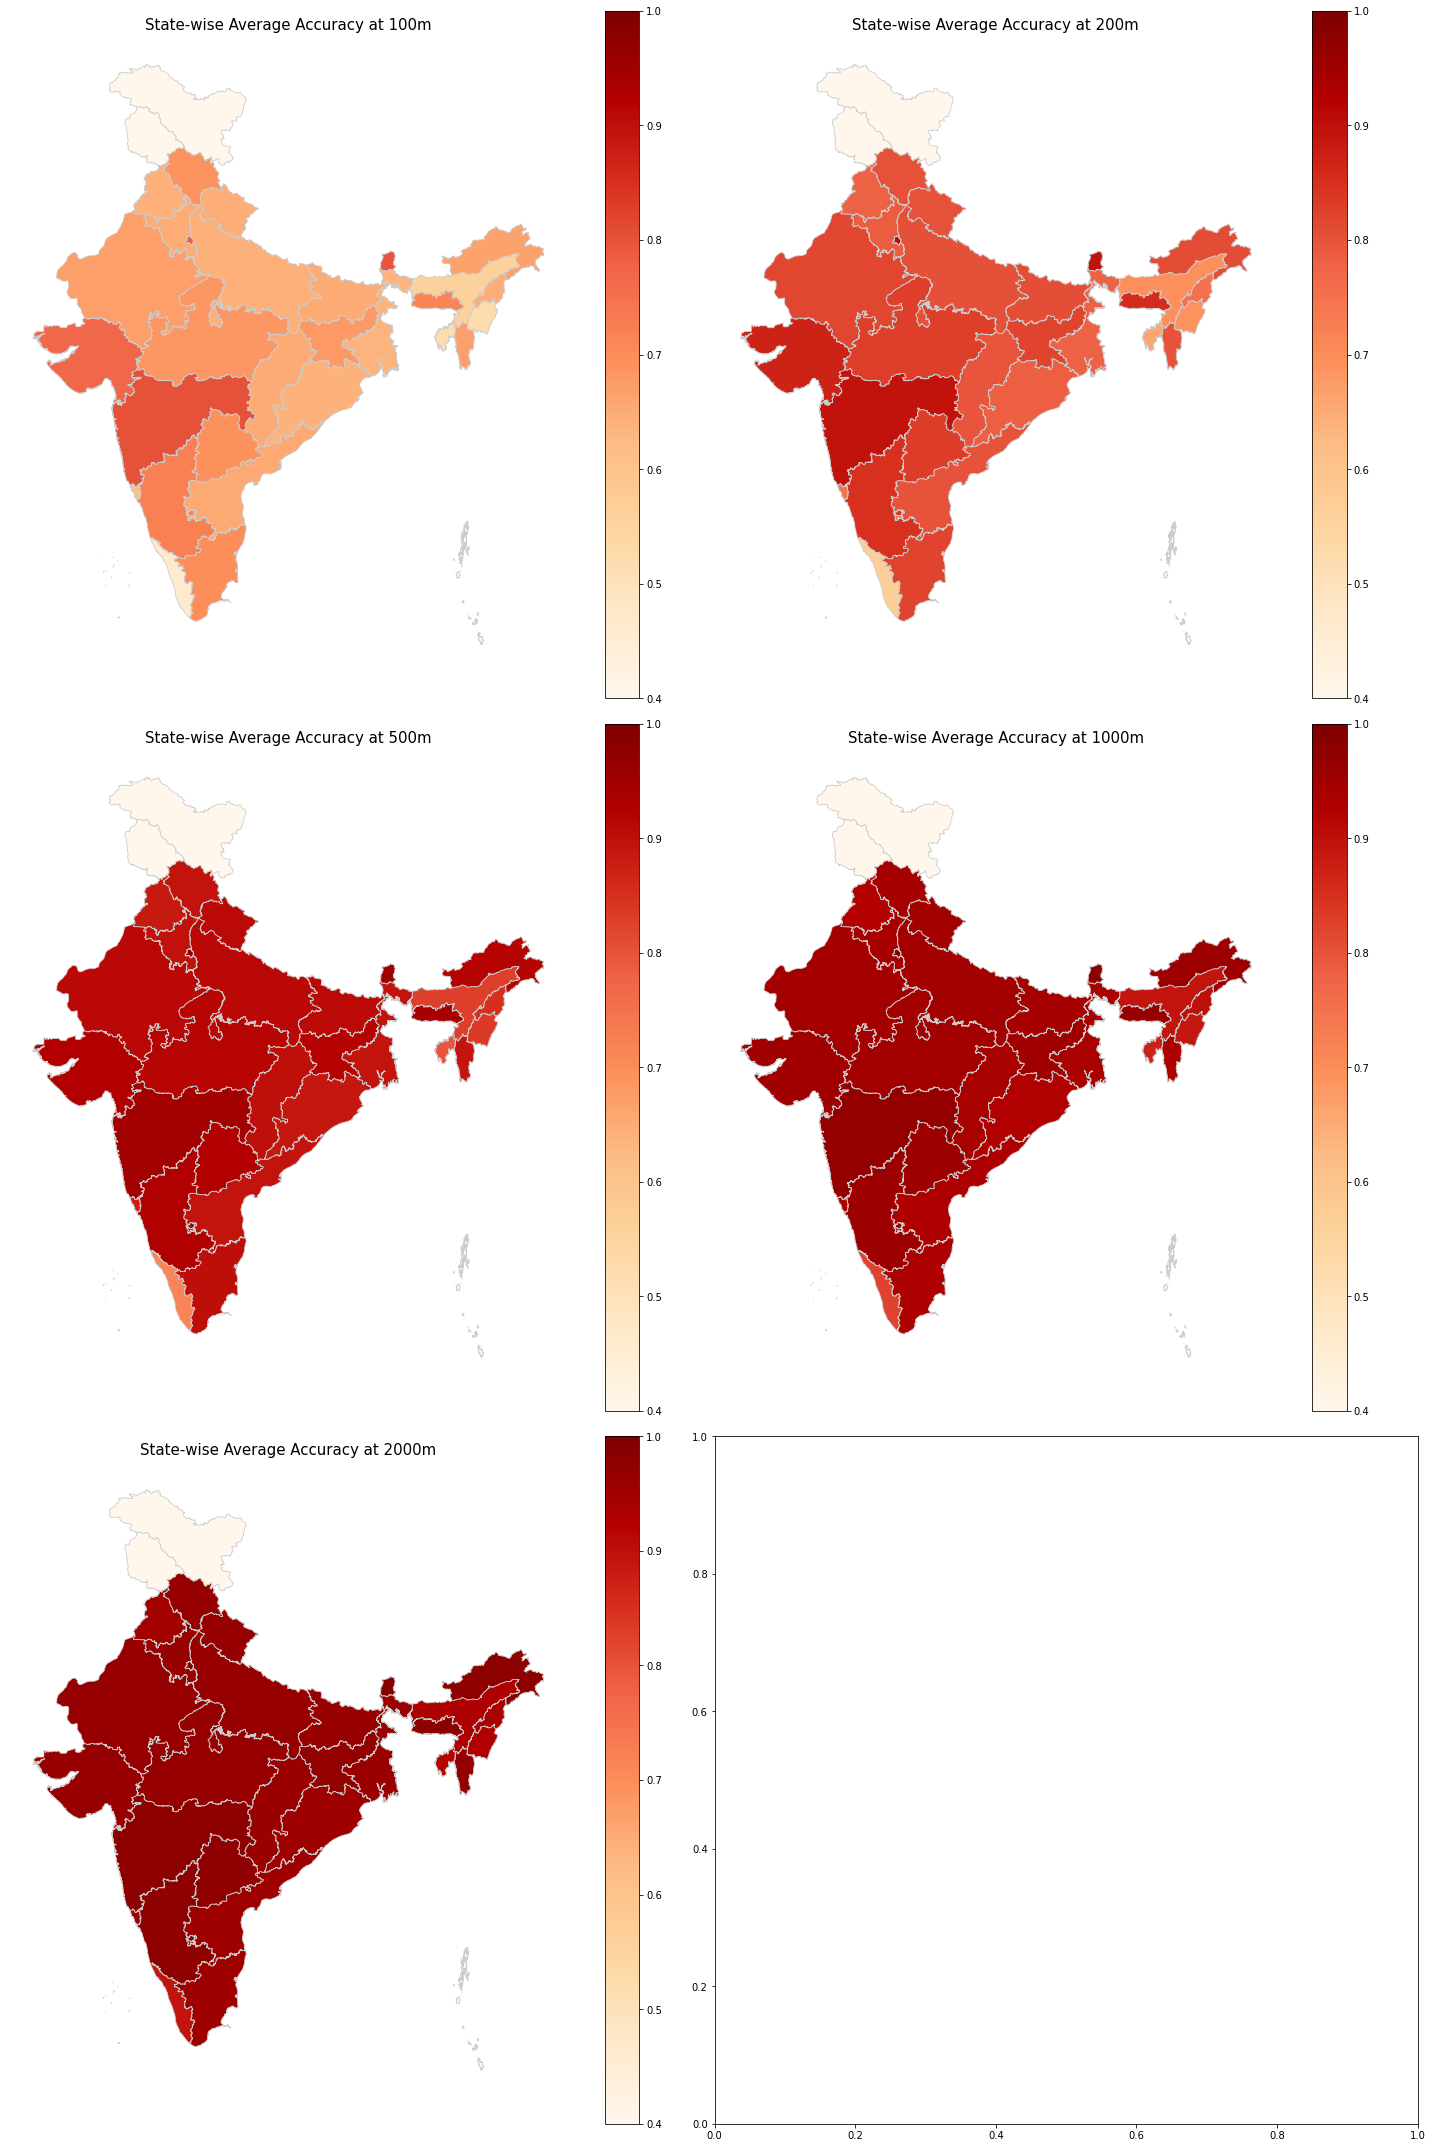

In [55]:
shapefile_path = "/home/uddeshya.singh/Experiments/India-shape" 
plot_state_heatmap(state_accuracies, shapefile_path)
